# HW5: Creating Charts that Show Time
Course: DS2023

**Rachel Seo ydp7xv**

**Topic:** Data Visualization           
**Purpose:** To practice graphing time.        
**Instructions:** Create a graph using the data provided and prompts below.       
Please comment your code to document your understanding. A code chunk follows each problem. You can use as many code chunks as you need to show your work.         
**Submission:** Upload an html to Canvas.       
**Learning Objective:** Students will be able to construct basic visualizations (e.g., bar charts, scatter plots, line graphs) and customize elements such as labels, colors, and scales to improve interpretability.      

*15 points*

### Set-up your environment

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Create a Graph
* In the data folder, attached to this assignment, you will find a file called `uva_stats_DS2023.csv`. This file contains games stats data of the current UVA MBB team for the 24-25 season. Variables include:     
  * `PLAYER`: player name   
  * `GAMEDATE`: date of the game    
  * `OPPONENT`: name of the opponent    
  * `POINTS`: points scored by the player during the game - points are scored by making field goals (2 or 3 pointers) or free throws    
  * `REBOUNDS`: rebounds by the player during the game - rebounds are when a player retrieves the ball after a missed field goal or free throw  
  * `ASSISTS`: assists by the player during the game - assists are passes that directly lead to a basket    

* Note: The data source is ESPN. 

* Create a graph that shows time. You can decided which players, stats, and time frame to use.  
  * This is intentionally vague. I want you to read about the team, explore the data, and create a graph that tells a story.    
* Remember to use the concepts we have learned in class to make your graph is **clear, visually appealing and informative**.  

Rubric:
You will be graded on the following:
* 5 points: student loads the data and creates a graph
* 10 points: student generally applies concepts learned in class to make the graph clear, visually appealing and informative.
* 15 points: student creates an exceptional graph that tells a compelling story.

In [4]:
# import data 
MBB = pd.read_csv('../code-python/data/uva_stats_DS2023.csv')

# filter data
columns_drop = ['ASSISTS']
MBB = MBB.drop(columns_drop, axis=1)

MBB['GAMEDATE'] = pd.to_datetime(MBB['GAMEDATE'])
MBB['GAMEDATE'] = MBB['GAMEDATE'].dt.strftime('%m-%d')

MBB.head()

,PLAYER,GAMEDATE,OPPONENT,POINTS,REBOUNDS
0,Andrew Rohde,11-06,Campbell Fighting Camels,1,3
1,Blake Buchanan,11-06,Campbell Fighting Camels,10,7
2,Dai Dai Ames,11-06,Campbell Fighting Camels,2,2
3,Elijah Saunders,11-06,Campbell Fighting Camels,11,5
4,Isaac McKneely,11-06,Campbell Fighting Camels,11,2


In [5]:
# figuring out top 5 players 
avg_ppp = MBB.groupby('PLAYER')['POINTS'].mean()
avg_ppp = avg_ppp.sort_values(ascending=False).rename('Average Points Per Player')
top_5_players = avg_ppp.nlargest(4).index

print(top_5_players)

Index(['Isaac McKneely', 'Elijah Saunders', 'Andrew Rohde', 'Jacob Cofie'], dtype='object', name='PLAYER')


In [6]:
# create a new column for average points per game
MBB['AVG_PPG'] = MBB.groupby('GAMEDATE')['POINTS'].transform('mean')

# filtering
filtered_MBB = MBB[(MBB['PLAYER'].isin(top_5_players)) & (MBB['GAMEDATE'] > '01-15') & (MBB['GAMEDATE'] < '02-18')][['PLAYER', 'GAMEDATE', 'AVG_PPG', 'POINTS']]

filtered_MBB.set_index('GAMEDATE', inplace=True)
filtered_MBB.head(20)


,PLAYER,AVG_PPG,POINTS
GAMEDATE,,,
01-18,Andrew Rohde,6.700000,7
01-18,Elijah Saunders,6.700000,19
01-18,Isaac McKneely,6.700000,10
01-18,Jacob Cofie,6.700000,2
01-21,Andrew Rohde,6.727273,16
01-21,Elijah Saunders,6.727273,10
01-21,Isaac McKneely,6.727273,21
01-21,Jacob Cofie,6.727273,2
01-25,Andrew Rohde,6.555556,3


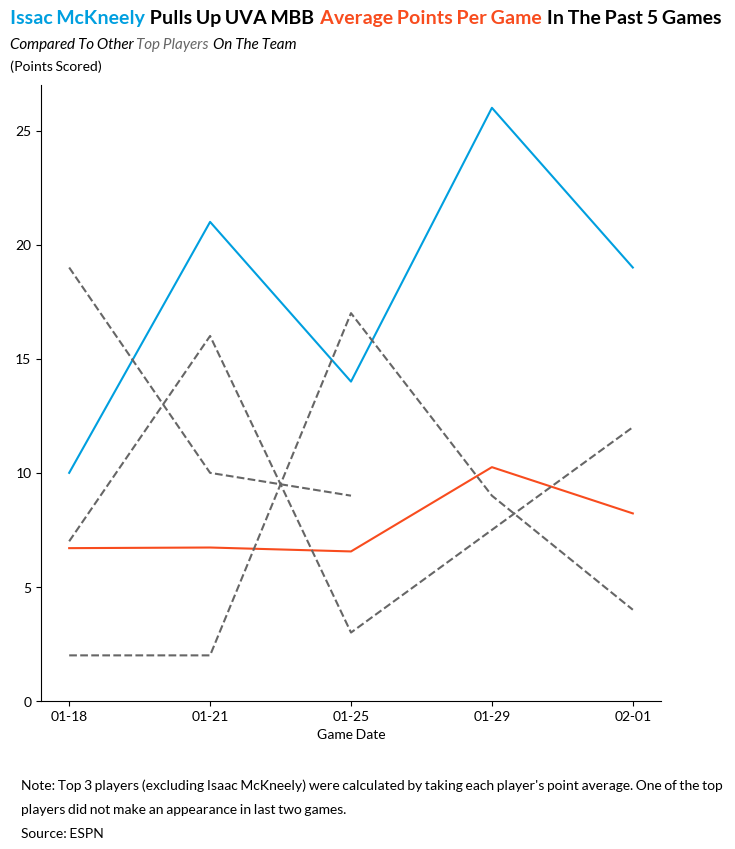

In [8]:
# create
plt.figure(figsize=(8, 8))

# font 
plt.rcParams['font.family'] = 'Lato'

# plot avg_ppg
avg_ppg_per_game = filtered_MBB.groupby(filtered_MBB.index)['AVG_PPG'].mean()
plt.plot(avg_ppg_per_game.index, avg_ppg_per_game, linestyle='-', color='#F84C1E', label='Average Points Per Game')

# Issac McKneely's points
isaac_points = filtered_MBB[filtered_MBB['PLAYER'] == 'Isaac McKneely']
plt.plot(isaac_points.index, isaac_points['POINTS'], linestyle='-', color='#009FDF', label='Isaac McKneely Points')

# top 3 (not including Issac)
elijah_points = filtered_MBB[filtered_MBB['PLAYER'] == 'Elijah Saunders']
plt.plot(elijah_points.index, elijah_points['POINTS'], linestyle='--', color='#666666', label='E. Saunders Points')

andrew_points = filtered_MBB[filtered_MBB['PLAYER'] == 'Andrew Rohde']
plt.plot(andrew_points.index, andrew_points['POINTS'], linestyle='--', color='#666666', label='A. Rohde Points')

jacob_points = filtered_MBB[filtered_MBB['PLAYER'] == 'Jacob Cofie']
plt.plot(jacob_points.index, jacob_points['POINTS'], linestyle='--', color='#666666', label='J. Cofie Points')


# title
plt.text(-0.05, 1.1, 'Issac McKneely', fontsize=14, weight='bold', ha='left', color='#009FDF', transform=plt.gca().transAxes)
plt.text(0.17, 1.1, ' Pulls Up UVA MBB', fontsize=14, weight='bold', ha='left', transform=plt.gca().transAxes)
plt.text(0.45, 1.1, 'Average Points Per Game', fontsize=14, weight='bold', ha='left', color='#F84C1E', transform=plt.gca().transAxes)
plt.text(0.81, 1.1, ' In The Past 5 Games ', fontsize=14, weight='bold', ha='left', transform=plt.gca().transAxes)
plt.text(-0.05, 1.06, 'Compared To Other', fontsize=11, style='italic', ha='left', transform=plt.gca().transAxes)
plt.text(0.154, 1.06, 'Top Players', fontsize=11, style='italic', ha='left', color = '#666666', transform=plt.gca().transAxes)
plt.text(0.278, 1.06, 'On The Team', fontsize=11, style='italic', ha='left', transform=plt.gca().transAxes)

# labels 
plt.title('(Points Scored)', fontsize=10, ha='left', x=-0.05, y=1.01)
plt.xlabel('Game Date')

# set y-axis to start at zero and go up to the maximum points scored with intervals of 5
plt.ylim(0, 27)
plt.yticks(np.arange(0, 30, 5))

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# note
plt.figtext(0.1, 0, "Note: Top 3 players (excluding Isaac McKneely) were calculated by taking each player's point average. One of the top", ha='left', fontsize=10)
plt.figtext(0.1, -0.03, "players did not make an appearance in last two games.", ha='left', fontsize=10)
plt.figtext(0.1, -0.06, "Source: ESPN", ha='left', fontsize=10)

plt.show()
